In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/HospitalityEmployees.csv')
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [3]:
df.shape

(348, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [5]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [6]:
df.ds = pd.to_datetime(df.ds)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
 1   y       348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


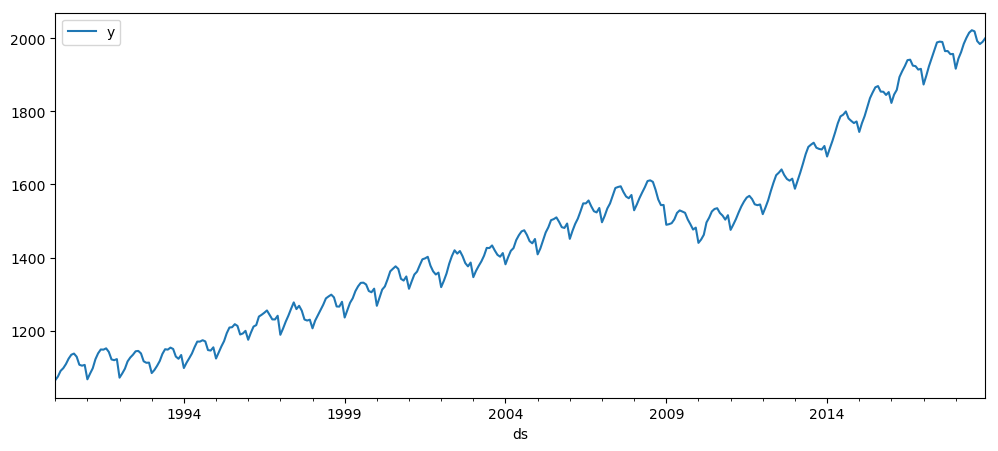

In [7]:
df.plot(x='ds',y='y',figsize=(12,5));

In [8]:
model = Prophet()
model.fit(df)

03:45:34 - cmdstanpy - INFO - Chain [1] start processing
03:45:35 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=24,freq='MS')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1106.933938,1046.660868,1071.704259,1106.933938,1106.933938,-47.569018,-47.569018,-47.569018,-47.569018,-47.569018,-47.569018,0.0,0.0,0.0,1059.364920
1,1990-02-01,1107.509944,1062.585465,1087.551028,1107.509944,1107.509944,-33.077624,-33.077624,-33.077624,-33.077624,-33.077624,-33.077624,0.0,0.0,0.0,1074.432321
2,1990-03-01,1108.030209,1077.352407,1101.957386,1108.030209,1108.030209,-18.611802,-18.611802,-18.611802,-18.611802,-18.611802,-18.611802,0.0,0.0,0.0,1089.418407
3,1990-04-01,1108.606215,1092.954510,1117.784833,1108.606215,1108.606215,-2.970998,-2.970998,-2.970998,-2.970998,-2.970998,-2.970998,0.0,0.0,0.0,1105.635217
4,1990-05-01,1109.163641,1109.285356,1135.409999,1109.163641,1109.163641,13.353243,13.353243,13.353243,13.353243,13.353243,13.353243,0.0,0.0,0.0,1122.516884


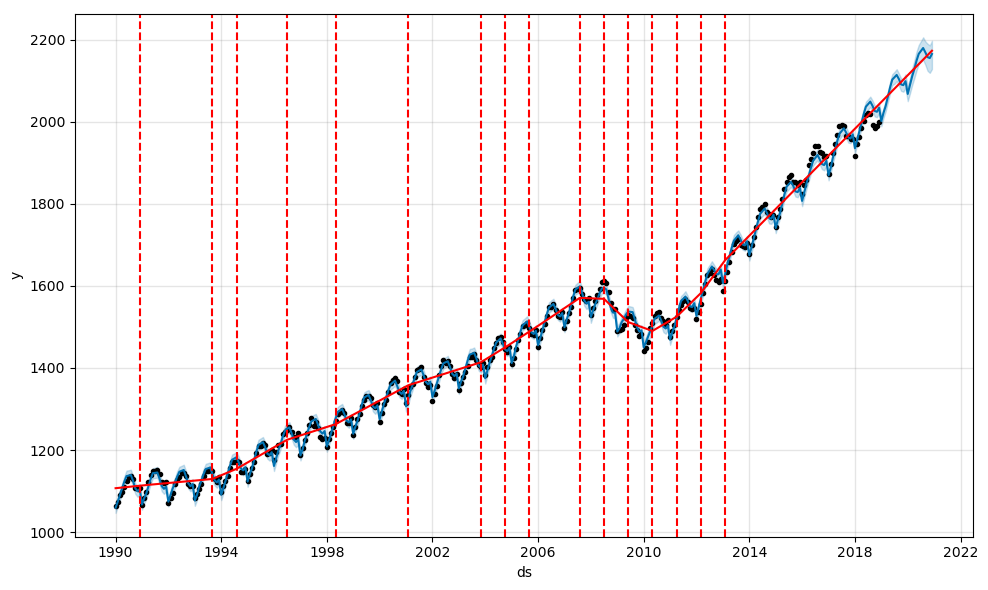

In [10]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model,forecast);